<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/XGBoost_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

In [2]:
#load dataset
X,y = load_breast_cancer(return_X_y=True)

#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [3]:
#Deafult XGBoost Model
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [4]:
#Evaluation matrics
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



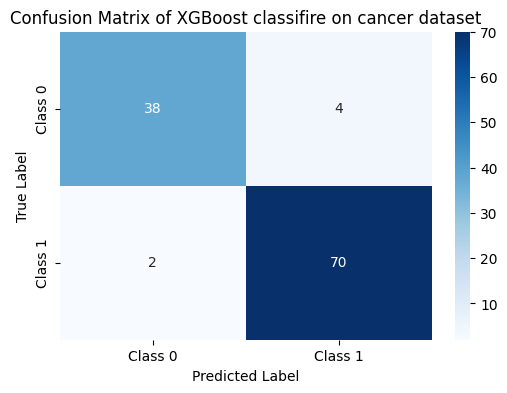

In [6]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Class 0', 'Class 1'],
    yticklabels=['Class 0', 'Class 1']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost classifire on cancer dataset')
plt.show()

In [7]:
#Early Stopping (Overfitting Control)
#What are we doing in this code?
#==> It trains an XGBoost binary classifier and automatically stops training when the model starts overfitting.
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 3,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

modelr = xgb.train(
    params = params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtest,"eval")],
    early_stopping_rounds=20
)

[0]	eval-logloss:0.61998
[1]	eval-logloss:0.58407
[2]	eval-logloss:0.55308
[3]	eval-logloss:0.52111
[4]	eval-logloss:0.49336
[5]	eval-logloss:0.46991
[6]	eval-logloss:0.44662
[7]	eval-logloss:0.42700
[8]	eval-logloss:0.40812
[9]	eval-logloss:0.38873
[10]	eval-logloss:0.37315
[11]	eval-logloss:0.35956
[12]	eval-logloss:0.34400
[13]	eval-logloss:0.33070
[14]	eval-logloss:0.31943
[15]	eval-logloss:0.30855
[16]	eval-logloss:0.29694
[17]	eval-logloss:0.28669
[18]	eval-logloss:0.27650
[19]	eval-logloss:0.26679
[20]	eval-logloss:0.25829
[21]	eval-logloss:0.25002
[22]	eval-logloss:0.24288
[23]	eval-logloss:0.23533
[24]	eval-logloss:0.22907
[25]	eval-logloss:0.22305
[26]	eval-logloss:0.21658
[27]	eval-logloss:0.21108
[28]	eval-logloss:0.20634
[29]	eval-logloss:0.20078
[30]	eval-logloss:0.19688
[31]	eval-logloss:0.19210
[32]	eval-logloss:0.18646
[33]	eval-logloss:0.18213
[34]	eval-logloss:0.17843
[35]	eval-logloss:0.17435
[36]	eval-logloss:0.16995
[37]	eval-logloss:0.16657
[38]	eval-logloss:0.16

In [10]:
#Prediction
y_proba = modelr.predict(dtest)
y_pred = (y_proba > 0.5).astype(int)

#Evaluation matrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report ",classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Classification report                precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



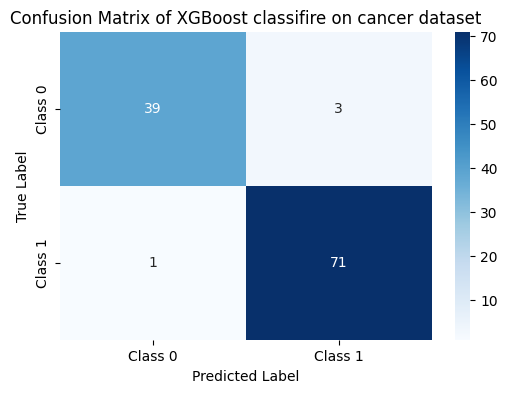

In [11]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Class 0', 'Class 1'],
    yticklabels=['Class 0', 'Class 1']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost classifire on cancer dataset')
plt.show()